# Importing required libraries

In [1]:
from __future__ import division
from PIL import ImageTk,Image 
import pandas as pd
import numpy as np
import pandas as pd
from sklearn import *
from datetime import datetime
from sklearn.svm import SVC
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import svm
import os
import librosa
import numpy as np
import pickle
import sys
import pyttsx3
from termcolor import colored
import speech_recognition as sr 
import datetime
import time 
from datetime import timedelta
import csv
from tkinter import *
from gtts import gTTS 
import math
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.columns = ['Diagnosis','Imaginary_min','Imaginary_avg','Real_min','Real_avg','Gender','Age','Smoking']

In [5]:
df.head() #first 5 rows

,Diagnosis,Imaginary_min,Imaginary_avg,Real_min,Real_avg,Gender,Age,Smoking
0,COPD,-325.39,-314.750360,-473.73,-469.263140,0,72,2
1,COPD,-323.00,-317.436056,-476.12,-471.897667,1,73,3
2,COPD,-327.78,-317.399670,-473.73,-468.856388,1,76,2
3,COPD,-325.39,-316.155785,-478.52,-472.869783,0,65,2
4,COPD,-327.78,-318.677553,-507.23,-469.024194,1,60,2


In [6]:
df[df['Diagnosis'] == 'COPD'].isnull().sum()

Diagnosis         0
Imaginary_min    39
Imaginary_avg    39
Real_min         39
Real_avg         39
Gender            0
Age               0
Smoking           0
dtype: int64

In [7]:
df[df['Diagnosis'] == 'HC'].isnull().sum()

Diagnosis          0
Imaginary_min    120
Imaginary_avg    120
Real_min         120
Real_avg         120
Gender             0
Age                0
Smoking            0
dtype: int64

In [8]:
df[df['Diagnosis'] == 'Infected'].isnull().sum()

Diagnosis         0
Imaginary_min    70
Imaginary_avg    70
Real_min         70
Real_avg         70
Gender            0
Age               0
Smoking           0
dtype: int64

In [9]:
df[df['Diagnosis'] == 'Asthma'].isnull().sum()

Diagnosis         0
Imaginary_min    70
Imaginary_avg    70
Real_min         70
Real_avg         70
Gender            0
Age               0
Smoking           0
dtype: int64

In [10]:
df.isnull().sum()

Diagnosis          0
Imaginary_min    299
Imaginary_avg    299
Real_min         299
Real_avg         299
Gender             0
Age                0
Smoking            0
dtype: int64

In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394     True
395     True
396    False
397    False
Length: 398, dtype: bool

<AxesSubplot:>

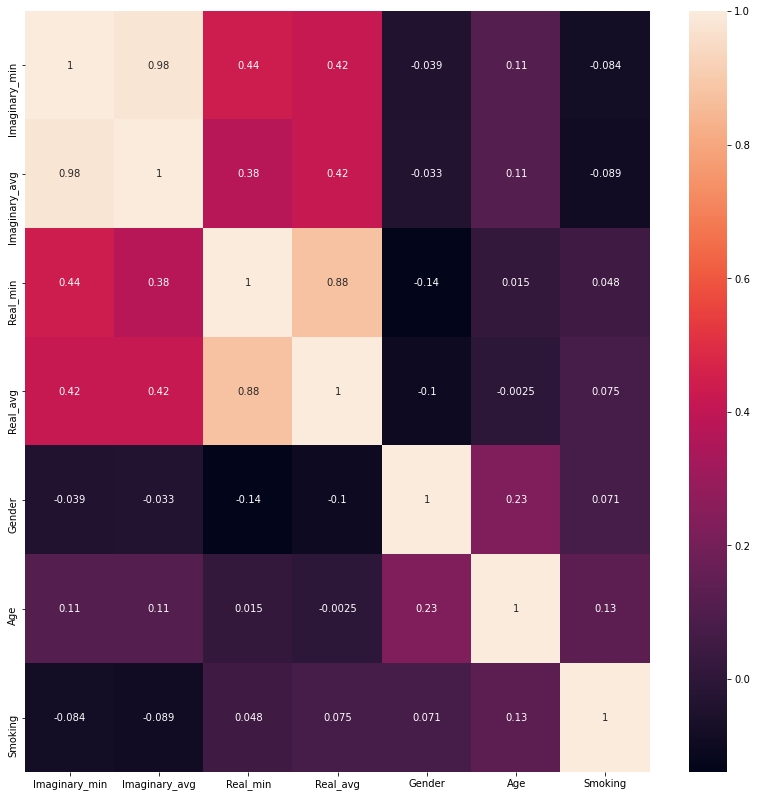

In [12]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True)

In [13]:
dfn=pd.notnull(df['Imaginary_avg'])
dfnt=df[dfn]

In [14]:
dfnt
G0=df[df['Gender']==0].count().Gender
G1=df[df['Gender']==1].count().Gender
s1=df[df['Smoking']==1].count().Smoking
s2=df[df['Smoking']==2].count().Smoking
s3=df[df['Smoking']==3].count().Smoking

In [15]:
df1=df[df['Diagnosis'] == 'COPD']
y=df1.count().Diagnosis
print(y)
x=df.count().Diagnosis
print(x)
pcopd=y/x
ng0c=df1[df1['Gender']==0].count().Gender
ng1c=df1[df1['Gender']==1].count().Gender
ns1c=df1[df1['Smoking']==1].count().Smoking
ns2c=df1[df1['Smoking']==2].count().Smoking
ns3c=df1[df1['Smoking']==3].count().Smoking
pg=ng0c/G0
print(pg)
pg=ng1c/G1
print(pg)
ps=ns1c/s1
print(ps)
ps=ns2c/s2
print(ps)
ps=ns3c/s3
print(ps)

78
398
0.09583333333333334
0.34810126582278483
0.0335195530726257
0.4161073825503356
0.14285714285714285


In [16]:
df2=df[df['Diagnosis'] == 'HC']
y1=df2.count().Diagnosis
print(y1)
x1=df.count().Diagnosis
print(x1)
ng0h=df2[df2['Gender']==0].count().Gender
ng1h=df2[df2['Gender']==1].count().Gender
ns1h=df2[df2['Smoking']==1].count().Smoking
ns2h=df2[df2['Smoking']==2].count().Smoking
ns3h=df2[df2['Smoking']==3].count().Smoking
pgh=ng0h/G0
print(pgh)
pgh=ng1h/G1
print(pgh)
psh=ns1h/s1
print(psh)
psh=ns2h/s2
print(psh)
psh=ns3h/s3
print(psh)
phc=y1/x1

160
398
0.43333333333333335
0.35443037974683544
0.5195530726256983
0.2348993288590604
0.45714285714285713


In [17]:
df2=df[df['Diagnosis'] == 'Asthma']
y2=df2.count().Diagnosis
print(y2)
x2=df.count().Diagnosis
print(x2)
ng0a=df2[df2['Gender']==0].count().Gender
ng1a=df2[df2['Gender']==1].count().Gender
ns1a=df2[df2['Smoking']==1].count().Smoking
ns2a=df2[df2['Smoking']==2].count().Smoking
ns3a=df2[df2['Smoking']==3].count().Smoking
pga=ng0a/G0
print(pga)
pga=ng1a/G1
print(pga)
psa=ns1a/s1
print(psa)
psa=ns2a/s2
print(psa)
psa=ns3a/s3
print(psa)
p_asthama=y2/x2

80
398
0.22916666666666666
0.15822784810126583
0.2011173184357542
0.2348993288590604
0.12857142857142856


In [18]:
df3=df[df['Diagnosis'] == 'Infected']
y3=df3.count().Diagnosis
print(y3)
x3=df.count().Diagnosis
print(x3)
ng0i=df3[df3['Gender']==0].count().Gender
ng1i=df3[df3['Gender']==1].count().Gender
ns1i=df3[df3['Smoking']==1].count().Smoking
ns2i=df3[df3['Smoking']==2].count().Smoking
ns3i=df3[df3['Smoking']==3].count().Smoking
pgi=ng0i/G0
print(pgi)
pgi=ng1i/G1
print(pgi)
psi=ns1i/s1
print(psi)
psi=ns2i/s2
print(psi)
psi=ns3i/s3
print(psi)
p_infected=y3/x3

80
398
0.24166666666666667
0.13924050632911392
0.24581005586592178
0.11409395973154363
0.2714285714285714


In [19]:
dfcopd=dfnt[dfnt['Diagnosis']=='COPD']
mean_age=dfcopd.Age.mean()
std_age=dfcopd.Age.std()
mean_img_min=dfcopd.Imaginary_min.mean()
std_img_min=dfcopd.Imaginary_min.std()
mean_img_avg=dfcopd.Imaginary_avg.mean()
std_img_avg=dfcopd.Imaginary_avg.std()
mean_real_min=dfcopd.Real_min.mean()
std_real_min=dfcopd.Real_min.std()
mean_real_avg=dfcopd.Real_avg.mean()
std_real_avg=dfcopd.Real_avg.std()

In [20]:
dfhc=dfnt[dfnt['Diagnosis']=='HC']
mean_age_hc=dfhc.Age.mean()
std_age_hc=dfhc.Age.std()
mean_img_min_hc=dfhc.Imaginary_min.mean()
std_img_min_hc=dfhc.Imaginary_min.std()
mean_img_avg_hc=dfhc.Imaginary_avg.mean()
std_img_avg_hc=dfhc.Imaginary_avg.std()
mean_real_min_hc=dfhc.Real_min.mean()
std_real_min_hc=dfhc.Real_min.std()
mean_real_avg_hc=dfhc.Real_avg.mean()
std_real_avg_hc=dfhc.Real_avg.std()

In [21]:
dfasthama=dfnt[dfnt['Diagnosis']=='Asthma']
mean_age_asthama=dfasthama.Age.mean()
std_age_asthama=dfasthama.Age.std()
mean_img_min_asthama=dfasthama.Imaginary_min.mean()
std_img_min_asthama=dfasthama.Imaginary_min.std()
mean_img_avg_asthama=dfasthama.Imaginary_avg.mean()
std_img_avg_asthama=dfasthama.Imaginary_avg.std()
mean_real_min_asthama=dfasthama.Real_min.mean()
std_real_min_asthama=dfasthama.Real_min.std()
mean_real_avg_asthama=dfasthama.Real_avg.mean()
std_real_avg_asthama=dfasthama.Real_avg.std()
dfasthama

,Diagnosis,Imaginary_min,Imaginary_avg,Real_min,Real_avg,Gender,Age,Smoking
255,Asthma,-320.61,-311.917780,-473.73,-469.128595,1,57,1
256,Asthma,-327.78,-318.229558,-471.34,-465.302094,0,46,3
257,Asthma,-320.61,-311.907785,-471.34,-467.755266,1,53,2
258,Asthma,-323.00,-313.596497,-478.52,-473.180280,0,60,1
259,Asthma,-320.61,-311.658041,-473.73,-469.729237,0,76,2
260,Asthma,-320.61,-312.022004,-473.73,-467.117838,0,44,1
261,Asthma,-320.61,-312.022107,-473.73,-469.531191,0,26,1
262,Asthma,-327.78,-315.510989,-468.95,-464.140266,0,17,3
263,Asthma,-320.61,-311.859266,-473.73,-470.890828,0,40,2
264,Asthma,-327.78,-318.446700,-478.52,-470.925927,0,58,3


In [22]:
dfinfected=dfnt[dfnt['Diagnosis']=='Infected']
mean_age_infected=dfinfected.Age.mean()
std_age_infected=dfinfected.Age.std()
mean_img_min_infected=dfinfected.Imaginary_min.mean()
std_img_min_infected=dfinfected.Imaginary_min.std()
mean_img_avg_infected=dfinfected.Imaginary_avg.mean()
std_img_avg_infected=dfinfected.Imaginary_avg.std()
mean_real_min_infected=dfinfected.Real_min.mean()
std_real_min_infected=dfinfected.Real_min.std()
mean_real_avg_infected=dfinfected.Real_avg.mean()
std_real_avg_infected=dfinfected.Real_avg.std()
dfinfected

,Diagnosis,Imaginary_min,Imaginary_avg,Real_min,Real_avg,Gender,Age,Smoking
360,Infected,-320.61,-312.076969,-476.12,-470.811461,0,28,1
361,Infected,-327.78,-319.555285,-476.12,-472.800581,0,27,1
362,Infected,-320.61,-311.782675,-476.12,-473.088617,0,31,1
363,Infected,-320.61,-311.648344,-476.12,-472.233157,1,22,1
364,Infected,-320.61,-311.423617,-478.52,-472.307030,0,50,1
365,Infected,-323.00,-314.384434,-476.12,-472.103689,1,38,1
366,Infected,-323.00,-314.323628,-476.12,-472.395413,1,36,1
367,Infected,-323.00,-312.856656,-480.91,-472.294281,0,33,1
368,Infected,-327.78,-319.305447,-476.12,-471.776918,1,43,1
374,Infected,-327.78,-318.068499,-473.73,-457.046464,0,25,2


In [23]:
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))*(float(x)-float(mean))/(2*var))
    return num/denom

In [24]:
p=[]
for i in range(len(dfcopd)):
    #print(dfcopd.iloc[i, 0], dfcopd.iloc[i, 5])
    p_img_min=normpdf(dfcopd.iloc[i,1],mean_img_min,std_img_min)
    p_img_avg=normpdf(dfcopd.iloc[i,2],mean_img_avg,std_img_avg)
    p_real_min=normpdf(dfcopd.iloc[i,3],mean_real_min,std_real_min)
    p_real_avg=normpdf(dfcopd.iloc[i,4],mean_real_avg,std_real_avg)
    if(dfcopd.iloc[i,5]==0):
        pg=ng0c/G0
    if(dfcopd.iloc[i,5]==1):
        pg=ng1c/G1
    p_age=normpdf(dfcopd.iloc[i,6],mean_age,std_age)
    if(dfcopd.iloc[i,7]==1):
        ps=ns1c/s1
    if(dfcopd.iloc[i,7]==2):
        ps=ns2c/s2
    if(dfcopd.iloc[i,7]==3):
        ps=ns3c/s3
    px=float(p_img_min*p_img_avg*p_real_min*p_real_avg*pg*p_age*ps*pcopd)
    #print(px)
    p.append(px)
x=np.mean(p)
print(x)

4.347214659027409e-11


In [25]:
p1=[]
for i in range(len(dfhc)):
    p_img_min_hc=normpdf(dfhc.iloc[i,1],mean_img_min_hc,std_img_min_hc)
    p_img_avg_hc=normpdf(dfhc.iloc[i,2],mean_img_avg_hc,std_img_avg_hc)
    p_real_min_hc=normpdf(dfhc.iloc[i,3],mean_real_min_hc,std_real_min_hc)
    p_real_avg_hc=normpdf(dfhc.iloc[i,4],mean_real_avg_hc,std_real_avg_hc)
    if(dfhc.iloc[i,5]==0):
        pg_hc=ng0h/G0
    if(dfhc.iloc[i,5]==1):
        pg_hc=ng1h/G1
    p_age_hc=normpdf(dfhc.iloc[i,6],mean_age_hc,std_age_hc)
    if(dfhc.iloc[i,7]==1):
        ps_hc=ns1h/s1
    if(dfhc.iloc[i,7]==2):
        ps_hc=ns2h/s2
    if(dfhc.iloc[i,7]==3):
        ps_hc=ns3h/s3
    px_hc=float(p_img_min_hc*p_img_avg_hc*p_real_min_hc*p_real_avg_hc*pg_hc*p_age_hc*ps_hc*phc)
    #print(px_hc)
    p1.append(px_hc)
x_hc=np.mean(p1)
print(x_hc)

4.928506079780247e-12


In [26]:
p2=[]
for i in range(len(dfasthama)):
    p_img_min_asthama=normpdf(dfasthama.iloc[i,1],mean_img_min_asthama,std_img_min_asthama)
    p_img_avg_asthama=normpdf(dfasthama.iloc[i,2],mean_img_avg_asthama,std_img_avg_asthama)
    p_real_min_asthama=normpdf(dfasthama.iloc[i,3],mean_real_min_asthama,std_real_min_asthama)
    p_real_avg_asthama=normpdf(dfasthama.iloc[i,4],mean_real_avg_asthama,std_real_avg_asthama)
    if(dfasthama.iloc[i,5]==0):
        pg_asthama=ng0a/G0
    if(dfasthama.iloc[i,5]==1):
        pg_asthama=ng1a/G1
    p_age_asthama=normpdf(dfasthama.iloc[i,6],mean_age_asthama,std_age_asthama)
    if(dfasthama.iloc[i,7]==1):
        ps_asthama=ns1a/s1
    if(dfasthama.iloc[i,7]==2):
        ps_asthama=ns2a/s2
    if(dfasthama.iloc[i,7]==3):
        ps_asthama=ns3a/s3
    px_asthama=float(p_img_min_asthama*p_img_avg_asthama*p_real_min_asthama*p_real_avg_asthama*pg_asthama*p_age_asthama*ps_asthama*p_asthama)
    p2.append(px_asthama)
x_asthama=np.mean(p2)
print(x_asthama)

1.6230300364683213e-08


In [27]:
p3=[]
for i in range(len(dfinfected)):
    p_img_min_infected=normpdf(dfinfected.iloc[i,1],mean_img_min_infected,std_img_min_infected)
    p_img_avg_infected=normpdf(dfinfected.iloc[i,2],mean_img_avg_infected,std_img_avg_infected)
    p_real_min_infected=normpdf(dfinfected.iloc[i,3],mean_real_min_infected,std_real_min_infected)
    p_real_avg_infected=normpdf(dfinfected.iloc[i,4],mean_real_avg_infected,std_real_avg_infected)
    if(dfinfected.iloc[i,5]==0):
        pg_infected=ng0i/G0
    if(dfinfected.iloc[i,5]==1):
        pg_infected=ng1i/G1
    p_age_infected=normpdf(dfinfected.iloc[i,6],mean_age_infected,std_age_infected)
    if(dfinfected.iloc[i,7]==1):
        ps_infected=ns1i/s1
    if(dfinfected.iloc[i,7]==2):
        ps_infected=ns2i/s2
    if(dfinfected.iloc[i,7]==3):
        ps_infected=ns3i/s3
    px_infected=float(p_img_min_infected*p_img_avg_infected*p_real_min_infected*p_real_avg_infected*pg_infected*p_age_infected*ps_infected*p_infected)
    p3.append(px_infected)
x_infected=np.mean(p3)
print(x_infected)

3.054978696236462e-08


In [28]:
df.shape #rows and columns

(398, 8)

In [29]:
from scipy.stats import invgauss
df=df.replace(np.nan,0)
count=0
for i in range(len(df)):
    if(df.iloc[i,0]=='COPD'):
        if(df.iloc[i,1]==0):
            if(df.iloc[i,5]==0):
                pg=ng0c/G0
            if(df.iloc[i,5]==1):
                pg=ng1c/G1
            if(df.iloc[i,7]==1):
                ps=ns1c/s1
            if(df.iloc[i,7]==2):
                ps=ns2c/s2
            if(df.iloc[i,7]==3):
                ps=ns3c/s3
            m=math.log(x)-math.log(pcopd)-(math.log(normpdf(df.iloc[i,6],mean_age,std_age))+math.log(ps)+math.log(pg))
            
            n=math.exp(m)
        
            df.iloc[i,1]=invgauss.rvs(n,mean_img_min,std_img_min)
            df.iloc[i,2]=invgauss.rvs(n,mean_img_avg,std_img_avg)
            df.iloc[i,3]=invgauss.rvs(n,mean_real_min,std_real_min)
            df.iloc[i,4]=invgauss.rvs(n,mean_real_avg,std_real_avg)
    if(df.iloc[i,0]=='HC'):
        if(df.iloc[i,1]==0):
            if(df.iloc[i,5]==0):
                pg_hc=ng0h/G0
            if(df.iloc[i,5]==1):
                pg_hc=ng1h/G1
            if(df.iloc[i,7]==1):
                ps_hc=ns1h/s1
            if(df.iloc[i,7]==2):
                ps_hc=ns2h/s2
            if(df.iloc[i,7]==3):
                ps_hc=ns3h/s3
            m_hc=math.log(x_hc)-math.log(phc)-(math.log(normpdf(df.iloc[i,6],mean_age_hc,std_age_hc))+math.log(ps_hc)+math.log(pg_hc))
        
            n_hc=math.exp(m_hc)
            
            df.iloc[i,1]=invgauss.rvs(n_hc,mean_img_min_hc,std_img_min_hc)
            df.iloc[i,2]=invgauss.rvs(n_hc,mean_img_avg_hc,std_img_avg_hc)
            df.iloc[i,3]=invgauss.rvs(n_hc,mean_real_min_hc,std_real_min_hc)
            df.iloc[i,4]=invgauss.rvs(n_hc,mean_real_avg_hc,std_real_avg_hc)
    if(df.iloc[i,0]=='Asthma'):
        if(df.iloc[i,1]==0):
            if(df.iloc[i,5]==0):
                pg_asthama=ng0a/G0
            if(df.iloc[i,5]==1):
                pg_asthama=ng1a/G1
            if(df.iloc[i,7]==1):
                ps_asthama=ns1a/s1
            if(df.iloc[i,7]==2):
                ps_asthama=ns2a/s2
            if(df.iloc[i,7]==3):
                ps_asthama=ns3a/s3
            m_asthama=math.log(x_asthama)-math.log(p_asthama)-(math.log(normpdf(df.iloc[i,6],mean_age_asthama,std_age_asthama))+math.log(ps_asthama)+math.log(pg_asthama))
            
            n_asthama=math.exp(m_asthama)
        
            df.iloc[i,1]=invgauss.rvs(n_asthama,mean_img_min_asthama,std_img_min_asthama)
            df.iloc[i,2]=invgauss.rvs(n_asthama,mean_img_avg_asthama,std_img_avg_asthama)
            df.iloc[i,3]=invgauss.rvs(n_asthama,mean_real_min_asthama,std_real_min_asthama)
            df.iloc[i,4]=invgauss.rvs(n_asthama,mean_real_avg_asthama,std_real_avg_asthama)
    if(df.iloc[i,0]=='Infected'):
        if(df.iloc[i,1]==0):
            if(df.iloc[i,5]==0):
                pg_infected=ng0i/G0
            if(df.iloc[i,5]==1):
                pg_infected=ng1i/G1
            if(df.iloc[i,7]==1):
                ps_infected=ns1i/s1
            if(df.iloc[i,7]==2):
                ps_infected=ns2i/s2
            if(df.iloc[i,7]==3):
                ps_infected=ns3i/s3
            m_infected=math.log(x_infected)-math.log(p_infected)-(math.log(normpdf(df.iloc[i,6],mean_age_infected,std_age_infected))+math.log(ps_infected)+math.log(pg_infected))
            n_infected=math.exp(m_infected)
            df.iloc[i,1]=invgauss.rvs(n_infected,mean_img_min_infected,std_img_min_infected)
            df.iloc[i,2]=invgauss.rvs(n_infected,mean_img_avg_infected,std_img_avg_infected)
            df.iloc[i,3]=invgauss.rvs(n_infected,mean_real_min_infected,std_real_min_infected)
            df.iloc[i,4]=invgauss.rvs(n_infected,mean_real_avg_infected,std_real_avg_infected)
        

In [30]:
df

,Diagnosis,Imaginary_min,Imaginary_avg,Real_min,Real_avg,Gender,Age,Smoking
0,COPD,-325.390000,-314.750360,-473.730000,-469.263140,0,72,2
1,COPD,-323.000000,-317.436056,-476.120000,-471.897667,1,73,3
2,COPD,-327.780000,-317.399670,-473.730000,-468.856388,1,76,2
3,COPD,-325.390000,-316.155785,-478.520000,-472.869783,0,65,2
4,COPD,-327.780000,-318.677553,-507.230000,-469.024194,1,60,2
...,...,...,...,...,...,...,...,...
393,Infected,-323.476086,-314.540563,-476.598824,-470.682756,0,49,2
394,Infected,-323.477808,-314.542360,-476.599886,-470.685468,0,37,1
395,Infected,-323.477804,-314.542351,-476.599882,-470.685455,0,29,1
396,Infected,-323.475639,-314.539881,-476.598564,-470.681990,1,51,1


In [31]:
df.describe()

,Imaginary_min,Imaginary_avg,Real_min,Real_avg,Gender,Age,Smoking
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,-317.062913,-307.158406,-473.288761,-460.605167,0.396985,48.665829,1.726131
std,14.927422,13.921554,24.505117,23.028503,0.489889,18.535999,0.742974
min,-337.350000,-328.280985,-626.860000,-473.928698,0.000000,17.000000,1.000000
25%,-323.474579,-314.539262,-476.120000,-469.466431,0.000000,31.000000,1.000000
50%,-321.802567,-312.022056,-473.730000,-465.369398,0.000000,49.000000,2.000000
75%,-313.459250,-302.805171,-471.749000,-451.847266,1.000000,64.000000,2.000000
max,-225.000000,-225.000000,-44.000000,-44.000000,1.000000,93.000000,3.000000


In [32]:
df[df['Diagnosis'] == 'COPD'].describe()

,Imaginary_min,Imaginary_avg,Real_min,Real_avg,Gender,Age,Smoking
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,-312.061450,-302.117447,-472.606885,-459.936769,0.705128,70.794872,2.051282
std,23.151838,20.896295,11.661023,10.816259,0.458936,9.239046,0.452911
min,-337.350000,-327.895087,-521.580000,-472.869783,0.000000,35.000000,1.000000
25%,-323.000000,-314.510607,-473.730000,-466.429418,0.000000,66.250000,2.000000
50%,-312.062050,-302.117973,-472.607178,-459.937047,1.000000,72.000000,2.000000
75%,-312.062040,-302.117959,-472.607106,-459.937041,1.000000,76.000000,2.000000
max,-225.000000,-225.000000,-441.000000,-414.675667,1.000000,93.000000,3.000000


In [33]:
df[df['Diagnosis'] == 'HC'].describe()

,Imaginary_min,Imaginary_avg,Real_min,Real_avg,Gender,Age,Smoking
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,-313.459250,-302.805171,-471.749000,-451.847266,0.350000,39.487500,1.618750
std,15.190911,13.756308,37.743965,33.230108,0.478467,13.269337,0.799936
min,-337.350000,-328.280985,-626.860000,-473.928698,0.000000,17.000000,1.000000
25%,-313.459250,-302.805171,-471.749000,-451.847266,0.000000,28.000000,1.000000
50%,-313.459250,-302.805171,-471.749000,-451.847266,0.000000,39.000000,1.000000
75%,-313.459250,-302.805171,-471.749000,-451.847266,1.000000,51.000000,2.000000
max,-234.000000,-234.000000,-44.000000,-44.000000,1.000000,75.000000,3.000000


In [34]:
df[df['Diagnosis'] == 'Asthma'].describe()

,Imaginary_min,Imaginary_avg,Real_min,Real_avg,Gender,Age,Smoking
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,-322.999396,-313.716586,-473.731463,-468.769662,0.312500,55.375000,1.662500
std,1.140829,0.913422,1.007320,0.923976,0.466437,17.864026,0.673997
min,-327.780000,-318.446700,-478.520000,-473.180280,0.000000,17.000000,1.000000
25%,-322.999679,-313.716810,-473.731704,-468.769914,0.000000,45.500000,1.000000
50%,-322.999481,-313.716656,-473.731534,-468.769750,0.000000,57.000000,2.000000
75%,-322.999138,-313.716340,-473.731177,-468.769464,1.000000,67.250000,2.000000
max,-320.610000,-311.658041,-468.950000,-464.140266,1.000000,88.000000,3.000000


In [35]:
df[df['Diagnosis'] == 'Infected'].describe()

,Imaginary_min,Imaginary_avg,Real_min,Real_avg,Gender,Age,Smoking
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,-323.210184,-314.221632,-476.590411,-470.608163,0.275000,38.737500,1.687500
std,2.576477,3.017801,0.640079,1.740750,0.449331,13.053681,0.835809
min,-327.780000,-319.555285,-480.910000,-473.088617,0.000000,17.000000,1.000000
25%,-323.477776,-314.542323,-476.599860,-470.685459,0.000000,28.000000,1.000000
50%,-323.477461,-314.542008,-476.599655,-470.685155,0.000000,38.000000,1.000000
75%,-323.474014,-314.538439,-476.597557,-470.682594,1.000000,49.250000,2.000000
max,-302.477643,-289.389378,-473.730000,-457.046464,1.000000,75.000000,3.000000


In [36]:
df.isnull().sum()

Diagnosis        0
Imaginary_min    0
Imaginary_avg    0
Real_min         0
Real_avg         0
Gender           0
Age              0
Smoking          0
dtype: int64

<AxesSubplot:>

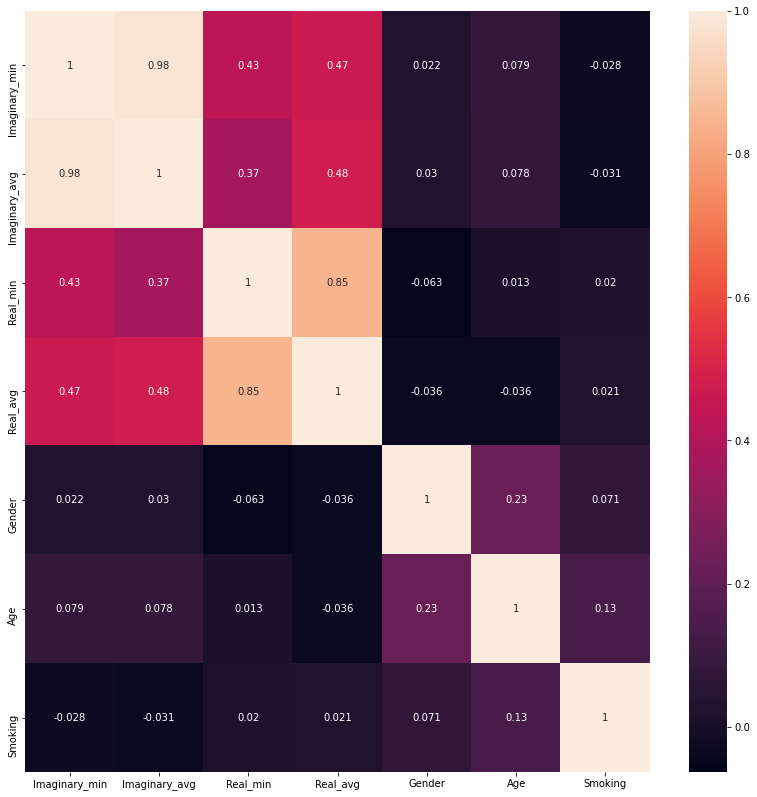

In [37]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True)

# Imputation: Imputation is the method in which the missing value of a certain variable is replaced by the mean of the available cases.

In [38]:
df.isnull().sum()

Diagnosis        0
Imaginary_min    0
Imaginary_avg    0
Real_min         0
Real_avg         0
Gender           0
Age              0
Smoking          0
dtype: int64

In [39]:
df['Diagnosis'].value_counts()

HC          160
Asthma       80
Infected     80
COPD         78
Name: Diagnosis, dtype: int64

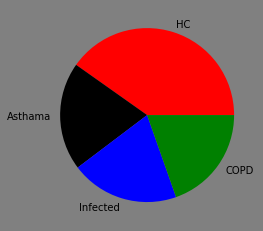

In [40]:
fig = plt.figure()
fig.patch.set_facecolor('grey')
plt.pie(df['Diagnosis'].value_counts(),colors=['red','black','blue','green'],labels=['HC','Asthama','Infected','COPD'])
plt.show()

In [41]:
column_names = ['Imaginary_min','Imaginary_avg','Real_min','Real_avg','Gender','Age','Smoking','Diagnosis']

training_data = df.reindex(columns=column_names)


In [42]:
training_data

,Imaginary_min,Imaginary_avg,Real_min,Real_avg,Gender,Age,Smoking,Diagnosis
0,-325.390000,-314.750360,-473.730000,-469.263140,0,72,2,COPD
1,-323.000000,-317.436056,-476.120000,-471.897667,1,73,3,COPD
2,-327.780000,-317.399670,-473.730000,-468.856388,1,76,2,COPD
3,-325.390000,-316.155785,-478.520000,-472.869783,0,65,2,COPD
4,-327.780000,-318.677553,-507.230000,-469.024194,1,60,2,COPD
...,...,...,...,...,...,...,...,...
393,-323.476086,-314.540563,-476.598824,-470.682756,0,49,2,Infected
394,-323.477808,-314.542360,-476.599886,-470.685468,0,37,1,Infected
395,-323.477804,-314.542351,-476.599882,-470.685455,0,29,1,Infected
396,-323.475639,-314.539881,-476.598564,-470.681990,1,51,1,Infected


<AxesSubplot:xlabel='Gender', ylabel='count'>

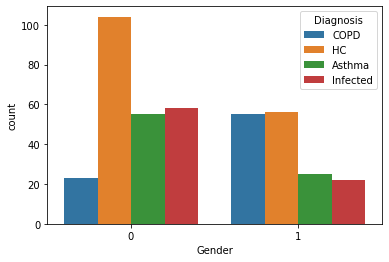

In [43]:
sns.countplot(x = "Gender",hue="Diagnosis", data = df)

In [44]:
df.head()

,Diagnosis,Imaginary_min,Imaginary_avg,Real_min,Real_avg,Gender,Age,Smoking
0,COPD,-325.39,-314.750360,-473.73,-469.263140,0,72,2
1,COPD,-323.00,-317.436056,-476.12,-471.897667,1,73,3
2,COPD,-327.78,-317.399670,-473.73,-468.856388,1,76,2
3,COPD,-325.39,-316.155785,-478.52,-472.869783,0,65,2
4,COPD,-327.78,-318.677553,-507.23,-469.024194,1,60,2


In [45]:
outputs = training_data.iloc[: , -1]
inputs = training_data.iloc[: , :-1]



In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(inputs,outputs,test_size=0.30,random_state=2)


In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train

(278, 7)
(120, 7)
(278,)
(120,)


,Imaginary_min,Imaginary_avg,Real_min,Real_avg,Gender,Age,Smoking
112,-325.390000,-317.351689,-471.340000,-467.391842,0,39,1
283,-322.998897,-313.716177,-473.731064,-468.769276,0,77,1
379,-323.477296,-314.541842,-476.599581,-470.684696,1,30,2
306,-322.997867,-313.715260,-473.730118,-468.768298,1,80,1
343,-323.476401,-314.540909,-476.599046,-470.683306,0,48,2
...,...,...,...,...,...,...,...
299,-322.999477,-313.716649,-473.731536,-468.769725,1,65,2
22,-312.062050,-302.117973,-472.607179,-459.937047,1,64,2
72,-312.062048,-302.117972,-472.607178,-459.937046,1,72,3
15,-312.062050,-302.117973,-472.607179,-459.937047,1,69,2


In [48]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=6,metric='euclidean')

## apply the knn object on the dataset(training phase)
Knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [49]:
y_train_pred=Knn.predict(X_train)
y_train_pred

array(['Asthma', 'Asthma', 'Infected', 'Asthma', 'Infected', 'HC', 'COPD',
       'Infected', 'Asthma', 'Infected', 'Asthma', 'HC', 'HC', 'Asthma',
       'Infected', 'HC', 'COPD', 'Asthma', 'Asthma', 'COPD', 'Asthma',
       'HC', 'HC', 'HC', 'HC', 'HC', 'Asthma', 'HC', 'HC', 'HC', 'COPD',
       'HC', 'HC', 'Asthma', 'Infected', 'Asthma', 'Asthma', 'COPD', 'HC',
       'COPD', 'Asthma', 'Asthma', 'Infected', 'COPD', 'COPD', 'HC',
       'Infected', 'HC', 'HC', 'HC', 'HC', 'HC', 'Asthma', 'HC', 'HC',
       'COPD', 'Infected', 'Infected', 'Infected', 'HC', 'HC', 'Infected',
       'COPD', 'HC', 'Infected', 'HC', 'COPD', 'HC', 'HC', 'HC', 'Asthma',
       'Asthma', 'HC', 'Infected', 'HC', 'Asthma', 'HC', 'Asthma', 'HC',
       'Asthma', 'HC', 'Infected', 'Asthma', 'HC', 'Infected', 'COPD',
       'HC', 'HC', 'Asthma', 'Asthma', 'HC', 'HC', 'HC', 'COPD', 'Asthma',
       'COPD', 'HC', 'Infected', 'HC', 'Asthma', 'Asthma', 'Asthma',
       'COPD', 'HC', 'Infected', 'Infected', 'HC', 'Ast

In [50]:
from sklearn.metrics import accuracy_score

scores=[]
for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    pred_test = knn_model.predict(X_test)
    scores.append(accuracy_score(y_test, pred_test))
scores


[0.8833333333333333,
 0.85,
 0.8583333333333333,
 0.8666666666666667,
 0.8583333333333333,
 0.825,
 0.7916666666666666,
 0.7833333333333333,
 0.7916666666666666,
 0.7583333333333333,
 0.7666666666666667,
 0.75,
 0.75,
 0.7416666666666667,
 0.7416666666666667,
 0.6916666666666667,
 0.7083333333333334,
 0.7083333333333334,
 0.7083333333333334]

In [51]:
print("For k = {} accuracy is {}".format(scores.index(max(scores))+1,max(scores)))

For k = 1 accuracy is 0.8833333333333333


In [52]:
final_model=KNeighborsClassifier(n_neighbors=1,metric='euclidean')
final_model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [53]:
final_train_pred=final_model.predict(X_train)
final_train_pred

array(['HC', 'Asthma', 'Infected', 'Asthma', 'Infected', 'HC', 'HC',
       'Infected', 'Asthma', 'Infected', 'Asthma', 'HC', 'HC', 'Infected',
       'Infected', 'HC', 'COPD', 'Asthma', 'Asthma', 'COPD', 'Asthma',
       'HC', 'HC', 'HC', 'HC', 'HC', 'Infected', 'HC', 'HC', 'Infected',
       'COPD', 'HC', 'HC', 'Asthma', 'Infected', 'COPD', 'Asthma', 'COPD',
       'HC', 'COPD', 'HC', 'Asthma', 'Infected', 'COPD', 'COPD', 'HC',
       'Asthma', 'HC', 'HC', 'HC', 'HC', 'HC', 'Asthma', 'HC', 'HC',
       'COPD', 'Infected', 'Infected', 'HC', 'HC', 'HC', 'Infected',
       'COPD', 'HC', 'Infected', 'HC', 'COPD', 'COPD', 'HC', 'HC', 'COPD',
       'Asthma', 'HC', 'Infected', 'HC', 'Asthma', 'HC', 'Asthma', 'HC',
       'Asthma', 'HC', 'Infected', 'Asthma', 'HC', 'Infected', 'COPD',
       'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'COPD', 'Asthma', 'HC',
       'HC', 'Infected', 'HC', 'HC', 'Asthma', 'Asthma', 'HC', 'HC',
       'Infected', 'Infected', 'HC', 'Asthma', 'Infected', 'COPD',


In [54]:
knn_train=accuracy_score(y_train,final_train_pred)
print(knn_train)

1.0


In [55]:
final_test_pred=final_model.predict(X_test)
final_test_pred

array(['HC', 'COPD', 'Asthma', 'HC', 'Infected', 'Asthma', 'COPD', 'HC',
       'HC', 'HC', 'Asthma', 'COPD', 'HC', 'HC', 'HC', 'HC', 'HC', 'COPD',
       'Infected', 'COPD', 'Infected', 'HC', 'HC', 'Infected', 'COPD',
       'Asthma', 'COPD', 'HC', 'Infected', 'HC', 'COPD', 'Infected',
       'COPD', 'Asthma', 'Asthma', 'HC', 'Asthma', 'COPD', 'COPD',
       'Infected', 'HC', 'HC', 'HC', 'Asthma', 'HC', 'Asthma', 'HC', 'HC',
       'Infected', 'COPD', 'HC', 'Asthma', 'HC', 'Asthma', 'HC', 'COPD',
       'HC', 'Infected', 'HC', 'COPD', 'HC', 'Infected', 'Infected',
       'Infected', 'HC', 'Infected', 'COPD', 'Infected', 'COPD',
       'Infected', 'HC', 'HC', 'COPD', 'Asthma', 'HC', 'Asthma', 'HC',
       'COPD', 'HC', 'Infected', 'HC', 'HC', 'Infected', 'Infected', 'HC',
       'Asthma', 'Infected', 'HC', 'Asthma', 'HC', 'Asthma', 'COPD', 'HC',
       'Asthma', 'Asthma', 'HC', 'HC', 'HC', 'Infected', 'Asthma',
       'Asthma', 'Infected', 'COPD', 'HC', 'Asthma', 'HC', 'HC', 'HC',
    

In [56]:
knn_test=accuracy_score(y_test,final_test_pred)
print(knn_test)

0.8833333333333333


# Support Vector Machine


In [57]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)
clf.fit(X_test,y_test)

SVC(kernel='linear')

In [58]:

##syntax:objname.ppredict(input_values)
y_pred_train=clf.predict(X_train)

svm_train=accuracy_score(y_train,y_train_pred)
print(svm_train)

0.8741007194244604


In [59]:
##syntax:objname.ppredict(input_values)
y_pred_test=clf.predict(X_test)
svm_test=accuracy_score(y_test,y_pred_test)
print(svm_test)

0.925


# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred = dt.predict(X_train)

In [61]:
dt_train=accuracy_score(y_train,pred)
print(dt_train)

1.0


In [62]:
test_pred=dt.predict(X_test)
print(test_pred)


['HC' 'COPD' 'Asthma' 'HC' 'Infected' 'Asthma' 'COPD' 'HC' 'COPD' 'HC'
 'Asthma' 'COPD' 'HC' 'HC' 'COPD' 'HC' 'HC' 'COPD' 'Infected' 'COPD'
 'Infected' 'HC' 'HC' 'Infected' 'COPD' 'Asthma' 'COPD' 'HC' 'Infected'
 'Asthma' 'COPD' 'Infected' 'HC' 'Asthma' 'HC' 'HC' 'Asthma' 'COPD' 'COPD'
 'Infected' 'HC' 'HC' 'HC' 'COPD' 'Asthma' 'Asthma' 'HC' 'HC' 'Infected'
 'HC' 'HC' 'Asthma' 'HC' 'Asthma' 'HC' 'COPD' 'HC' 'Infected' 'HC' 'COPD'
 'HC' 'Infected' 'Infected' 'Infected' 'HC' 'Infected' 'COPD' 'Infected'
 'COPD' 'Infected' 'HC' 'HC' 'COPD' 'Asthma' 'HC' 'Asthma' 'HC' 'COPD'
 'Asthma' 'Infected' 'HC' 'HC' 'Infected' 'Infected' 'HC' 'Asthma'
 'Infected' 'HC' 'Asthma' 'HC' 'Asthma' 'COPD' 'HC' 'Asthma' 'Asthma' 'HC'
 'HC' 'HC' 'Asthma' 'Asthma' 'Asthma' 'Infected' 'COPD' 'HC' 'Asthma' 'HC'
 'HC' 'HC' 'Infected' 'HC' 'HC' 'HC' 'Asthma' 'COPD' 'Asthma' 'Asthma'
 'HC' 'HC' 'Infected' 'COPD']


In [63]:
dt_test=accuracy_score(y_test,test_pred)
print(dt_test)

0.875


In [64]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()   
classifier.fit(X_train,y_train)
pred = classifier.predict(X_train)

In [65]:
nb_train=accuracy_score(y_train,pred)
print(nb_train)

0.8884892086330936


In [66]:
test_pred=dt.predict(X_test)


In [67]:
nb_test=accuracy_score(y_test,test_pred)
print(nb_test)

0.875


# Gradient boosting

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
pred=gbc.predict(X_train)

In [69]:
gb_train=accuracy_score(y_train,pred)
print(gb_train)

1.0


In [70]:
test_pred=gbc.predict(X_test)

In [71]:
gb_test=accuracy_score(y_test,test_pred)
print(gb_test)

0.9333333333333333


In [72]:
acc=[]
acc.append(knn_train*100)
acc.append(knn_test*100)
acc.append(svm_train*100)
acc.append(svm_test*100)
acc.append(nb_train*100)
acc.append(nb_test*100)
acc.append(dt_train*100)
acc.append(dt_test*100)
acc.append(gb_train*100)
acc.append(gb_test*100)

In [73]:
print(' knn traning data accuracy = {}\n knn testing data accuracy = {}\n svm traning data accuracy = {} \n svm testing data accuracy = {}\n NB training data accuracy = {} \n NB testing data accuracy = {} \n DT training data accuracy = {} \n DT testing data accuracy = {} \n GB training data accuracy = {} \n GB testing data accuracy = {}'.format(acc[0],acc[1],acc[2],acc[3],acc[4],acc[5],acc[6],acc[7],acc[8],acc[9]))

 knn traning data accuracy = 100.0
 knn testing data accuracy = 88.33333333333333
 svm traning data accuracy = 87.41007194244604 
 svm testing data accuracy = 92.5
 NB training data accuracy = 88.84892086330936 
 NB testing data accuracy = 87.5 
 DT training data accuracy = 100.0 
 DT testing data accuracy = 87.5 
 GB training data accuracy = 100.0 
 GB testing data accuracy = 93.33333333333333


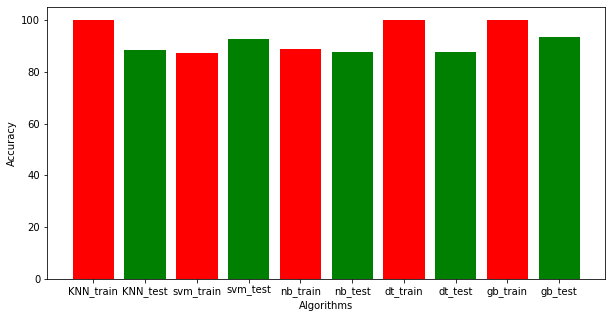

In [74]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,5))
algo=['KNN_train','KNN_test','svm_train','svm_test','nb_train','nb_test','dt_train','dt_test','gb_train','gb_test']

plt.bar(algo,acc,color=['red','green','red','green','red','green','red','green','red','green'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()

In [76]:

testSet = [[-311,-305,-422,-445,1,67,1]]
test = pd.DataFrame(testSet)

result1=gbc.predict(test)
print('The final prediction on the test set is',result1)


testSet2 = [[-323,-301,-405,-466,0,92,2]]
test = pd.DataFrame(testSet2)
result2=gbc.predict(test)

print('knn Prediction on the second test set is:',result2)


The final prediction on the test set is ['HC']
knn Prediction on the second test set is: ['COPD']
